<a href="https://colab.research.google.com/github/aleksejalex/ske_assignment/blob/main/SKE_AG_protokol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cíl 1

pomocí parametrických a neparametrických metod pro cenzorovaná data
odhadněte vhodný spolehlivostní model pro časy dožití (survt $T_j$) obou
vybraných podskupin pacientů. Pro kontrolu fitu parametrické rodiny
užijte Kaplan-Meierův plot nebo Nelson-Aalenův 'hazard plot' (nejlépe
v jednom obrázku spolu s parametrickým průběhem), resp. QQ/PP při RC.

In [3]:
!pip install reliability

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.5/256.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3fcfe3b96aa4aea17710496b8b44d9dde37c853719e0fd8015a5cb39478cc7e2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=50a5b96c66c0ef52249b1a83a506ea2cc0ceff362fc47bc47fa430a8a2594a20
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2

In [19]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import reliability as rel



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

4
['examplevarr']


In [ ]:
# additional settings for plotting images:
#plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [6]:
# import datasetu (pomoci Pandas)
# (dataset stazen z >>    )
url = "https://raw.githubusercontent.com/aleksejalex/ske_assignment/main/dataset/Data%20set%20SKE_VeteranClinicTrial_modif-RC_final4_dataset_edited_for_import_to_python.csv?token=GHSAT0AAAAAABY6GWJWO6ADKPS5D4UAOH6KY7YPZGQ"
imported_data = pd.read_csv(url)

imported_data
#data.info

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
5,1,1,10,1,20,5,49,0
6,1,1,82,1,40,10,69,10
7,1,1,110,0,80,29,68,0
8,1,1,314,1,50,18,43,0
9,1,1,100,0,70,6,70,0


In [ ]:
imported_data.describe()

In [7]:
# moje data: vse, kde cell=2
data = pd.DataFrame()
data = imported_data[imported_data['cell']==2]

data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48,48,48,48,48,48,48,48
mean,1.375,2,71.6667,0.75,53.5417,9.25,59.875,2.29167
std,0.489246,0,85.7749,0.437595,19.101,13.9093,9.92016,4.24744
min,1,2,2,0,20,1,35,0
25%,1,2,20,0.75,40,2,54.75,0
50%,1,2,51,1,60,4,62.5,0
75%,2,2,97.5,1,70,11,67,0
max,2,2,392,1,85,87,72,10


In [8]:
data[data['cens']==0]

,treat,cell,survt,cens,KAR,didur,age,prith
20,1,2,123,0,40,3,55,0
21,1,2,97,0,60,5,67,0
23,1,2,59,0,30,2,65,0
29,1,2,21,0,40,2,55,10
31,1,2,139,0,80,2,64,0
35,1,2,287,0,60,25,66,10
38,1,2,122,0,80,28,53,0
40,1,2,54,0,70,1,67,0
90,2,2,103,0,70,22,36,10
96,2,2,7,0,20,11,66,0


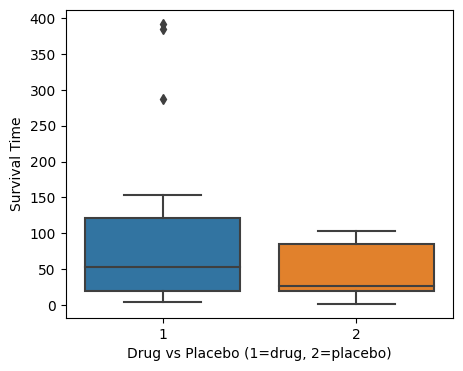

In [9]:
plt.figure(figsize=(5, 4))
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.show()

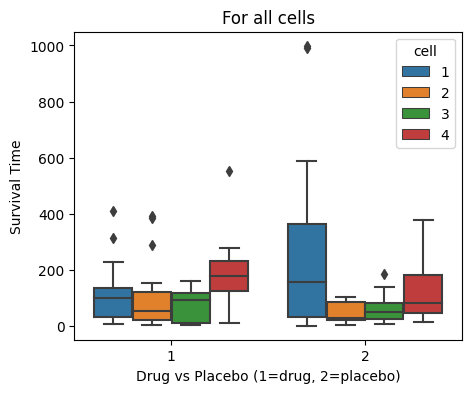

In [10]:
plt.figure(figsize=(5, 4))
sbn.boxplot(x='treat', y='survt', data=imported_data, hue='cell')
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('For all cells')
plt.show()

In [11]:
data_drug = pd.DataFrame()
data_drug = data[data['treat']==1]
data_placebo = pd.DataFrame()
data_placebo = data[data['treat']==2]

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 22/8 (26.66667% right censored) 

   Distribution   Alpha     Beta   Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
       Gamma_3P 270.734 0.498054  3.9999                                                                                    -120.394 247.711 250.991 3.78275       TNC
     Weibull_3P 106.134  0.61087  3.9999                                                                                    -120.934 248.792 252.073 3.65602       TNC
Weibull_Mixture                           56.568  1.09815 389.964 116.374     0.758537                                      -118.037 248.573 253.079 3.59253    powell
 Loglogistic_3P 57.7984 0.775869  3.9999                                                                                    -122.664 252.251 255.532 3.53831       TNC
     Weibull_CR                          128.491 0.744

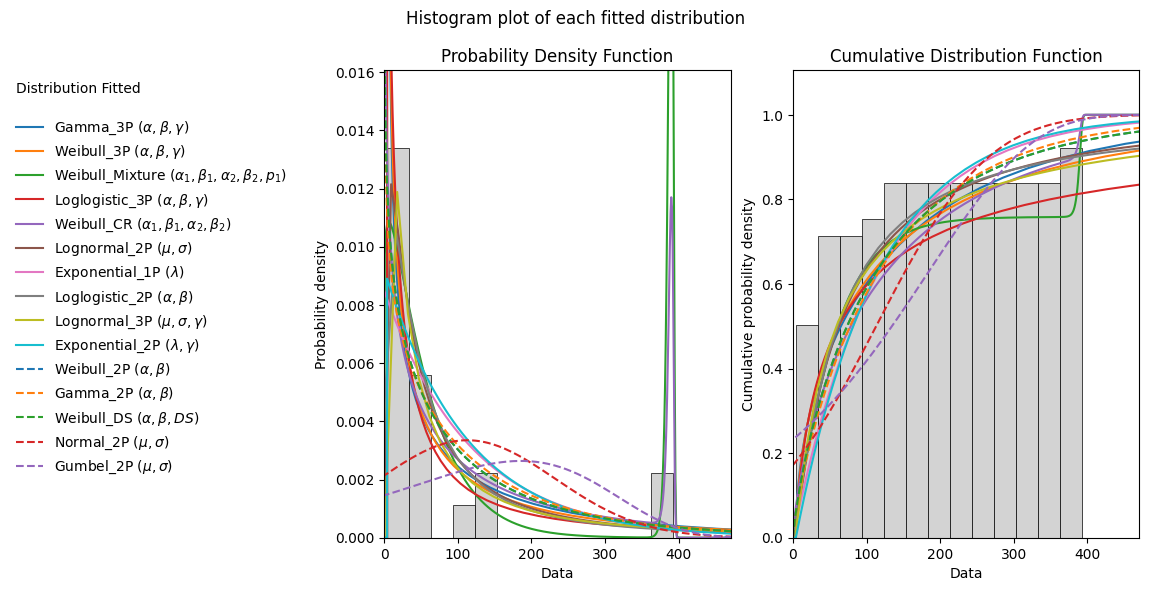

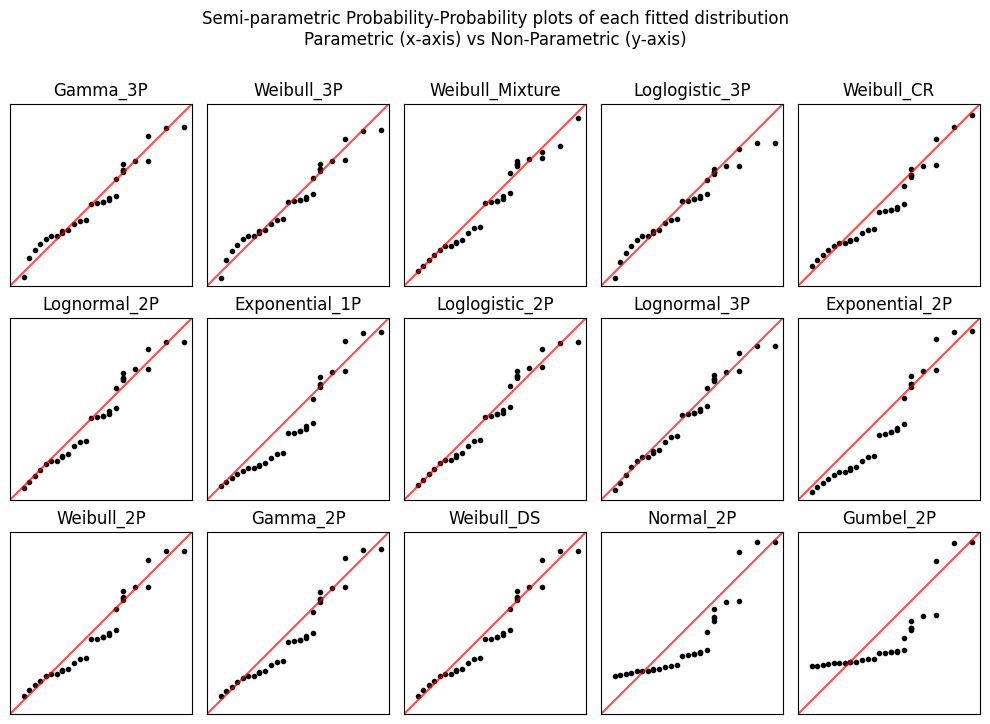

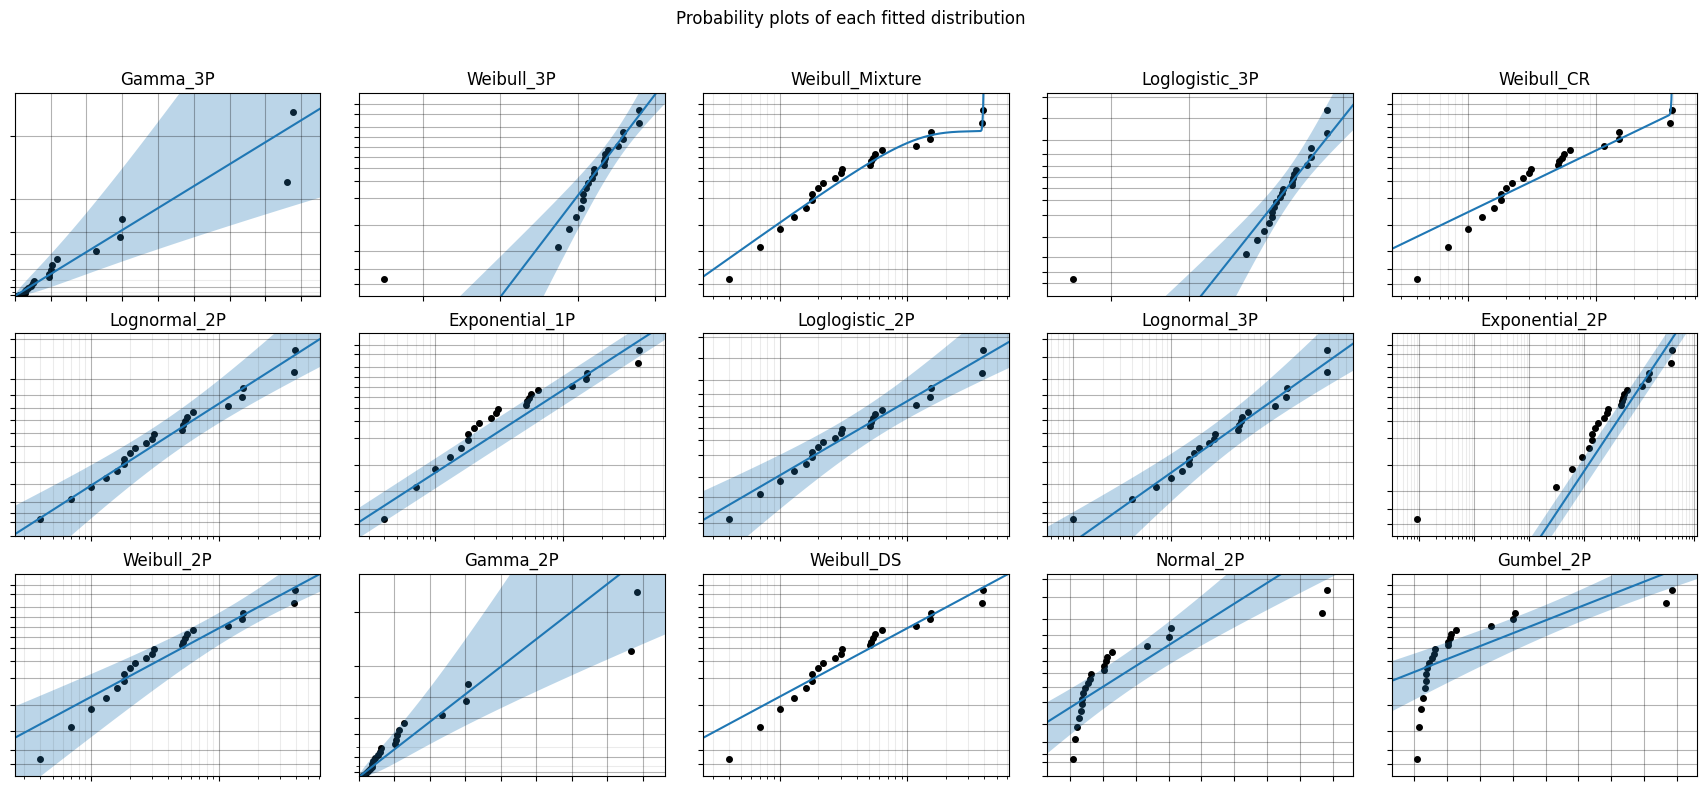

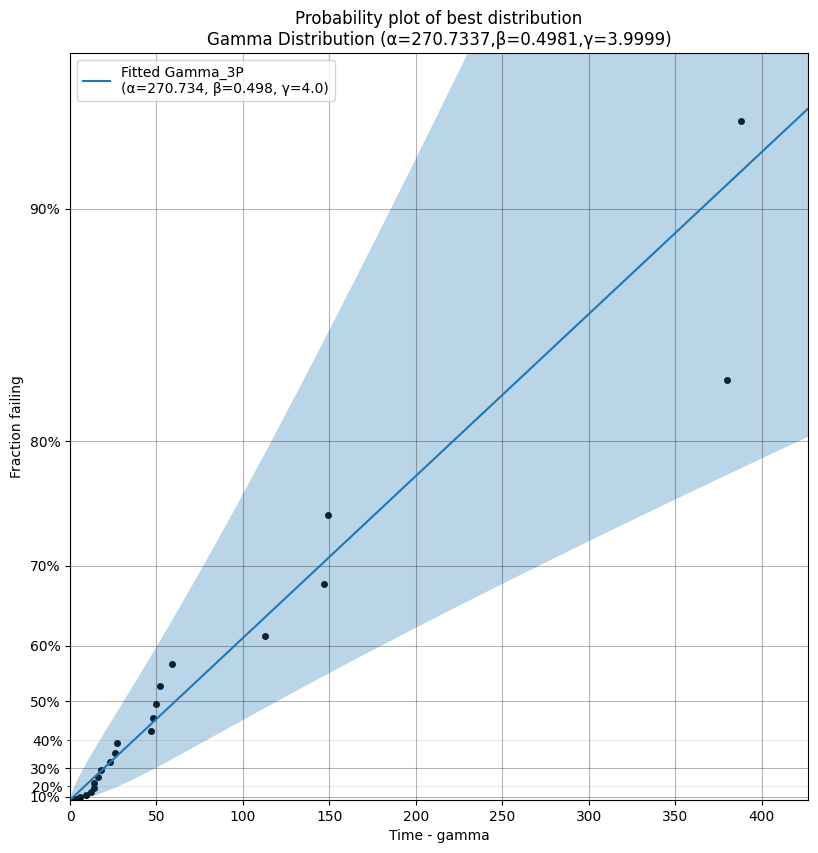

The best fitting distribution was Gamma_3P which had parameters [270.73371757   0.49805362   3.9999    ]


In [12]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

results_drug = Fit_Everything(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values)
print('The best fitting distribution was', results_drug.best_distribution_name, 'which had parameters', results_drug.best_distribution.parameters)

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         4.12884        0.270364   3.59893   4.65874
    Sigma         1.39198        0.217242   1.02516   1.89007 

Goodness of fit    Value
 Log-likelihood -124.588
           AICc   253.62
            BIC  255.978
             AD  3.60495 

Results from Fit_Gamma_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         270.734         121.179   112.603   650.931
     Beta        0.498054        0.115733  0.315851  0.785361
    Gamma          3.9999       0.0001393   3.99963   4.00017 

Goodness of fit    Value
 Log-likelihood -120.394
           AICc  247.711
            BIC  250.991
 

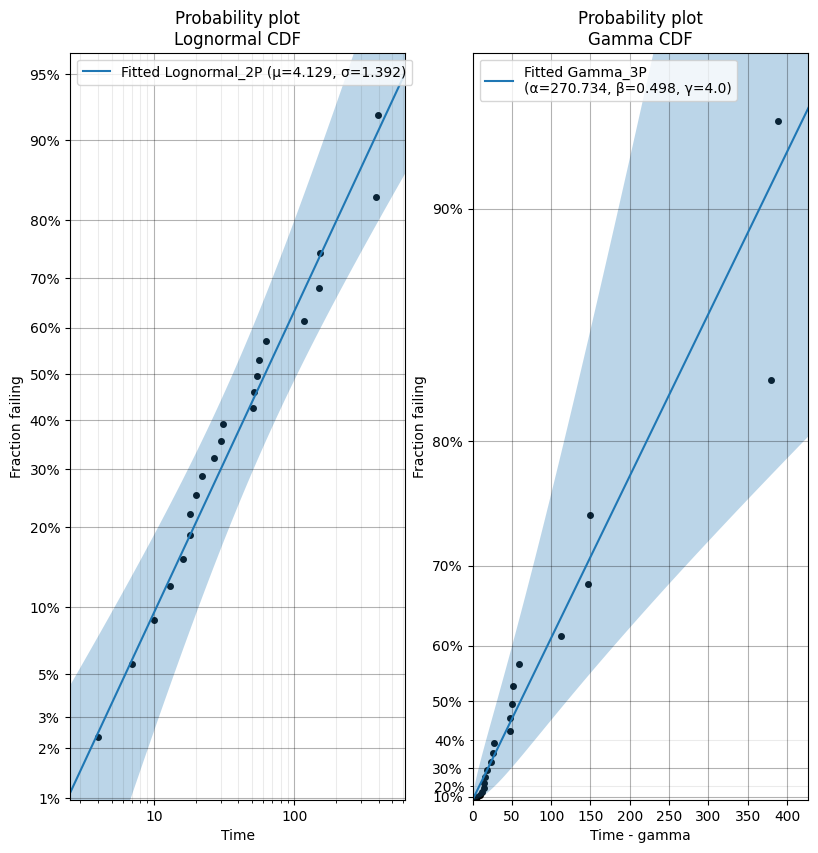

In [13]:
from reliability.Fitters import Fit_Lognormal_2P
from reliability.Fitters import Fit_Gamma_3P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(5,4))
plt.subplot(121)
dist_E = Fit_Lognormal_2P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution
plt.subplot(122)
dist_W = Fit_Gamma_3P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution

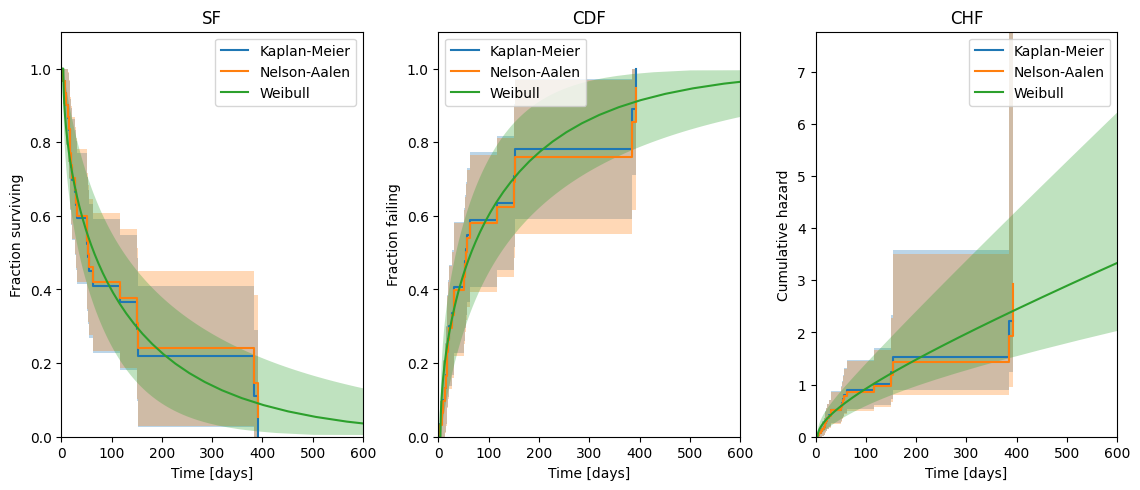

In [14]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
dist_W.SF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
dist_W.CDF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
dist_W.CHF(label='Weibull')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()

## placebo pacienti

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 14/14 (50% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2      Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_CR                           115.526 0.984049      99 2.08622e+06                                                  -51.3175 112.374 115.964 17.1835       TNC
Weibull_Mixture                           22.1751  2.24525 99.3627     16.4843     0.396431                                     -68.3816 149.491 153.424 17.1814       TNC
 Exponential_1P                                                                                                0.0111643        -76.9305 156.015 157.193 17.3161       TNC
       Gamma_3P 184.632 0.598035   1.9999                                                                                       -74.2718 155.544  158.54 17.4695       TNC
 Exponential_2P                    1.99

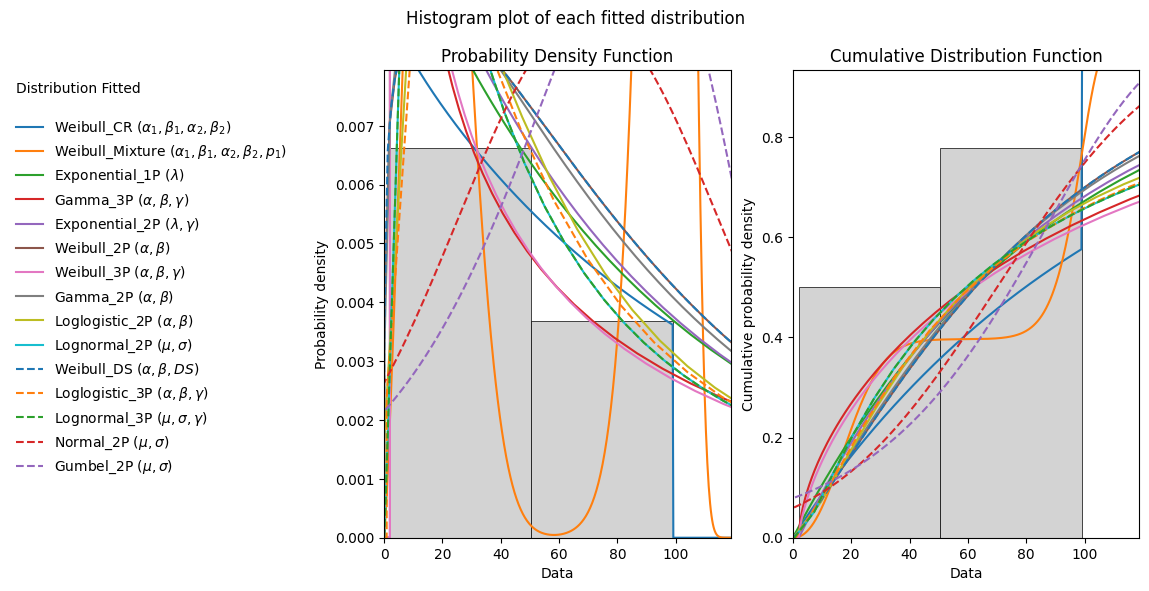

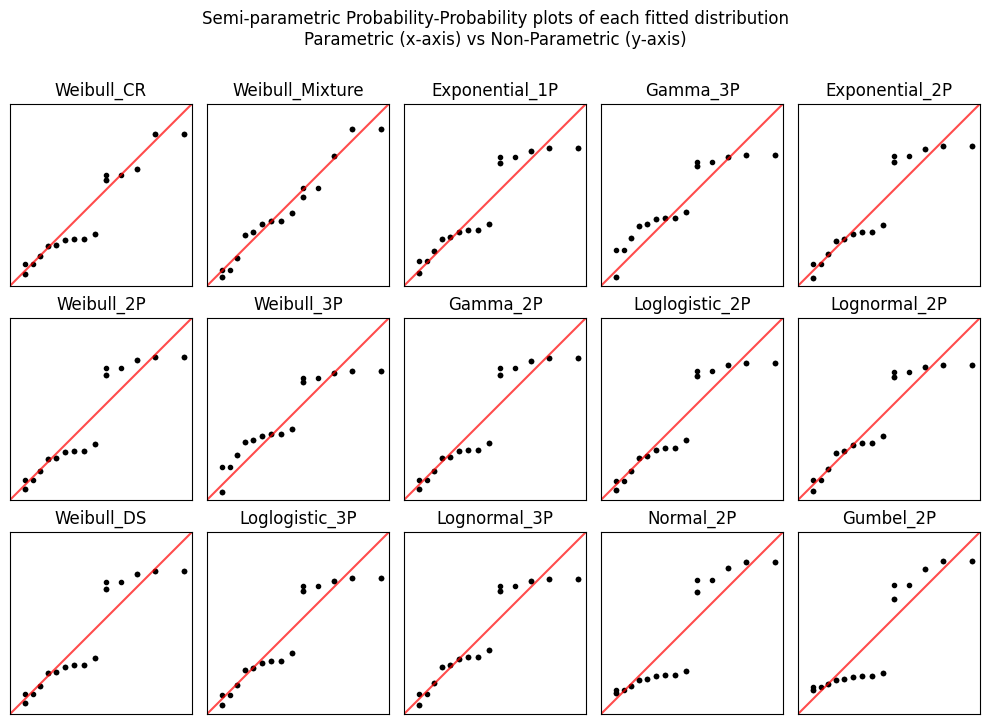

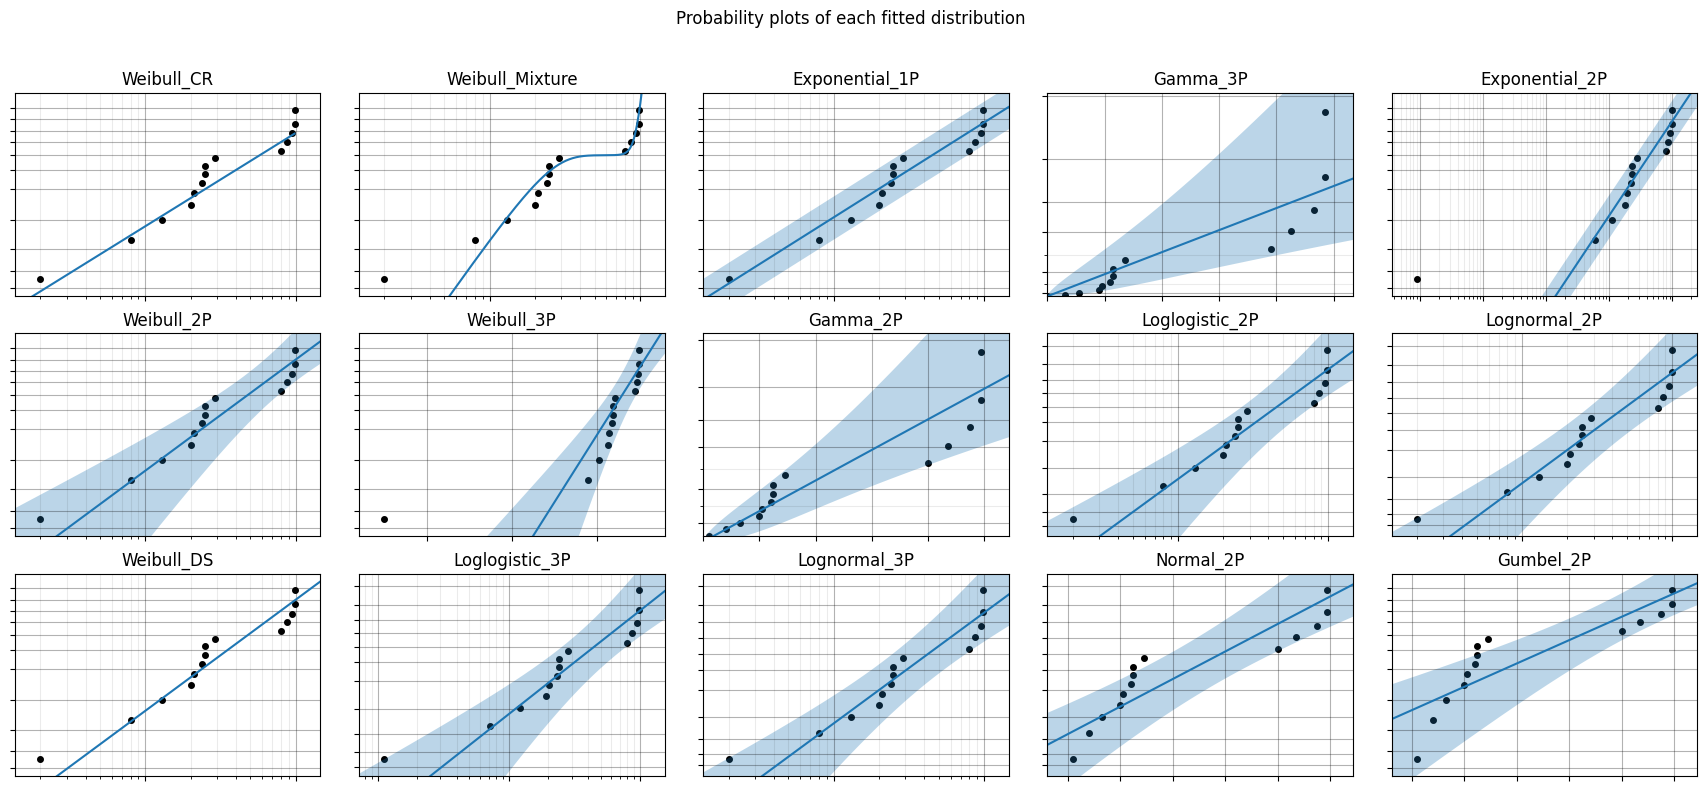

In [18]:
results_placebo = Fit_Everything(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==1].survt.values,
                        show_best_distribution_probability_plot=False)

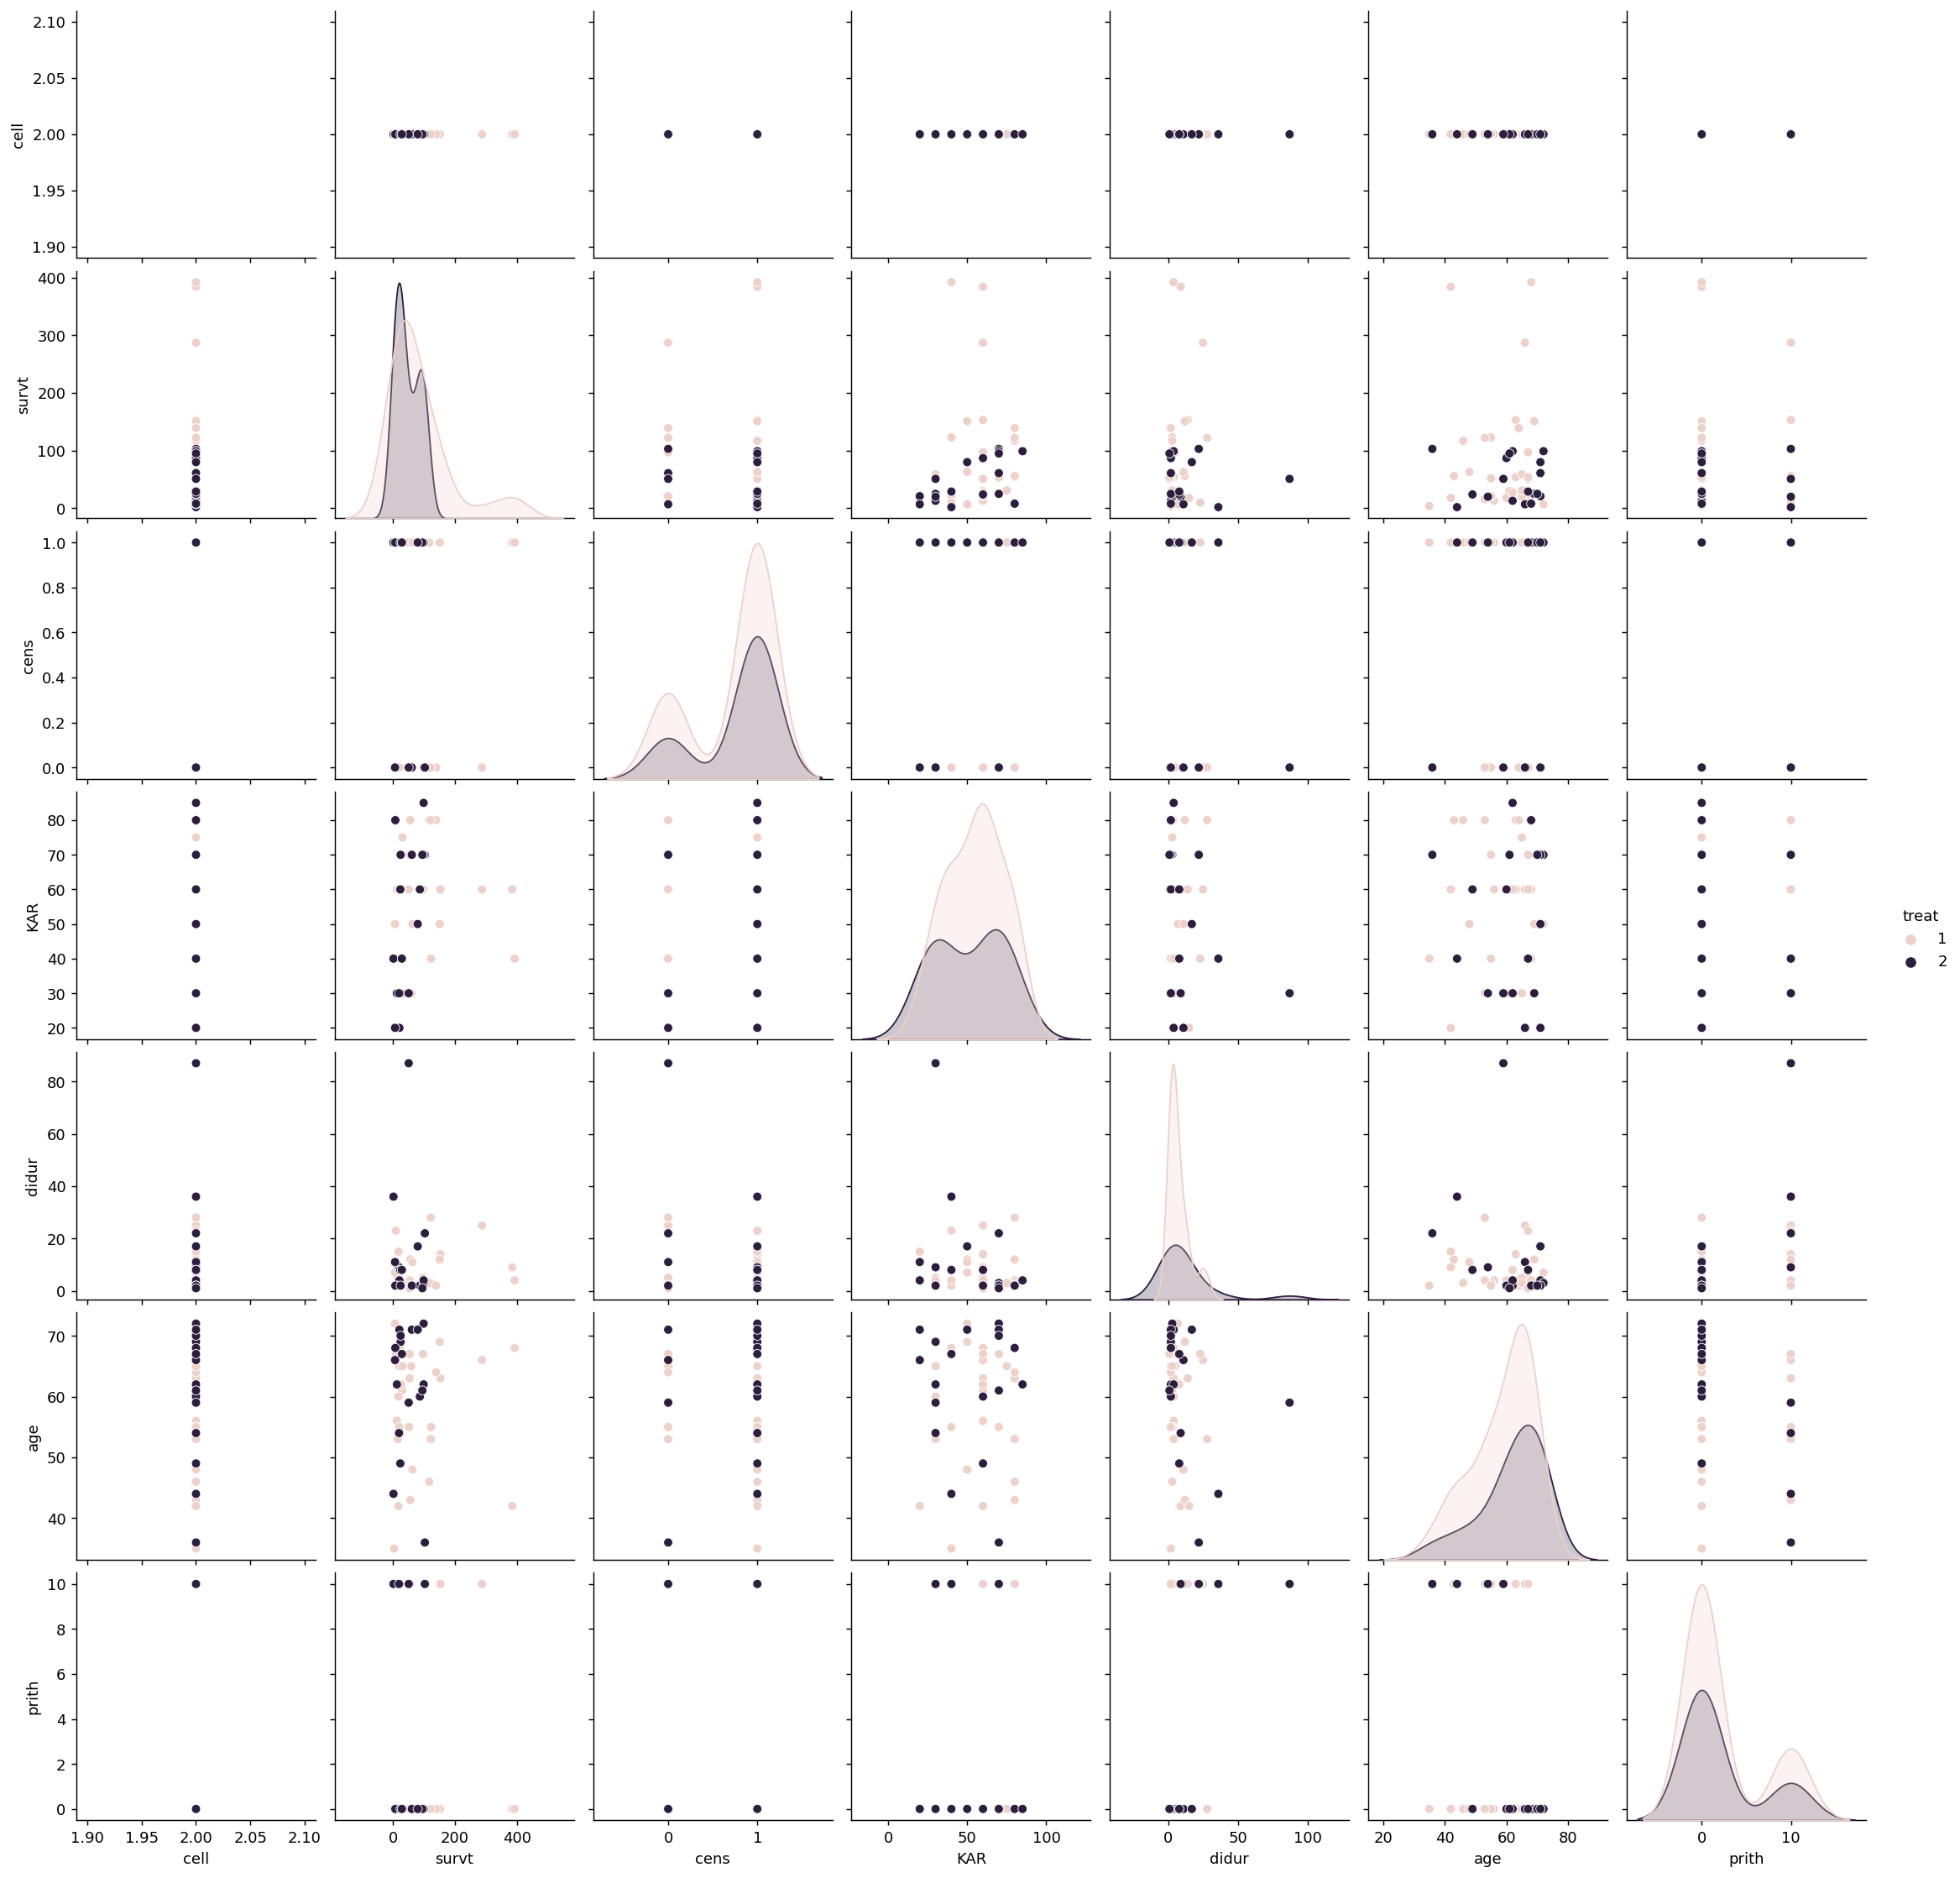

In [14]:
sbn.pairplot(data=data, hue='treat')
plt.show()